# Assignment 2 


Plotting Temperature vs Time from weather data (CSV format).

In [1]:
# import the pandas library
import pandas as pd

# matplotlib is a popular plotting library
# import (part of) matplotlib, the pyplot module
import matplotlib.pyplot as plt

Need to have a look at the data inside, so that we know what variables we have to plot.

In [2]:
# load the csv dataset using pandas
df = pd.read_csv("weatherreadings1.csv")

In [3]:
# print a truncate version to the console
df

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:00:00+00:00,2024-10-03T14:00:00+00:00,1,True,True,1,WeatherLink,335,77.8,...,False,-8.8545,53.5244,45,202410034sie5kcbthe69kyhyyguw31uhh,2024-10-03T14:00:00+00:00,1000013318,2024-10-03T14:00:25.2118092+00:00,1,12578832191
85,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:15:00+00:00,2024-10-03T14:15:00+00:00,1,True,True,1,WeatherLink,14,77.2,...,False,-8.8545,53.5244,45,202410037edh3yhb1re69kyhyyguw31uhh,2024-10-03T14:15:00+00:00,1000013318,2024-10-03T14:15:20.6677085+00:00,1,12578846874
86,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:30:00+00:00,2024-10-03T14:30:00+00:00,1,True,True,1,WeatherLink,354,76.9,...,False,-8.8545,53.5244,45,20241003b396uzhb1oe69kyhyytrtenn4a,2024-10-03T14:30:00+00:00,1000013318,2024-10-03T14:30:45.6588747+00:00,1,12578862046
87,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:45:00+00:00,2024-10-03T14:45:00+00:00,1,True,True,1,WeatherLink,307,76.5,...,False,-8.8545,53.5244,45,20241003m16wydcb1ae69kyhyytrtenn4a,2024-10-03T14:45:00+00:00,1000013318,2024-10-03T14:47:10.3227765+00:00,1,12578876749


In [4]:
# view the first row in the dataframe
df.iloc[0]

siteId                            f2d42aea-f516-ec11-b76a-0003ff599499
reportStartDateTime                          2024-10-02T16:15:00+00:00
reportEndDateTime                            2024-10-02T16:15:00+00:00
collectionName                                                       1
isPublic                                                          True
isLatestVersion                                                   True
observationType                                                      1
softwareType                                               WeatherLink
windDirection                                                      322
relativeHumidity                                                  70.4
windSpeed_MilePerHour                                             3.06
windSpeed_MetrePerSecond                                       1.36794
dryBulbTemperature_Fahrenheit                                     60.7
dryBulbTemperature_Celsius                                   15.944444
wetBul

In [5]:
# view statistics overview
df.describe()

,collectionName,observationType,windDirection,relativeHumidity,windSpeed_MilePerHour,windSpeed_MetrePerSecond,dryBulbTemperature_Fahrenheit,dryBulbTemperature_Celsius,wetBulbTemperature_Fahrenheit,wetBulbTemperature_Celsius,...,airPressure_InchOfMercury,airPressure_Hectopascal,dewPointTemperature_Fahrenheit,dewPointTemperature_Celsius,longitude,latitude,height,externalSiteId,version,externalId
count,89.0,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.0000,8.900000e+01,89.0,8.900000e+01,89.0,8.900000e+01
mean,1.0,1.0,188.292135,85.135955,2.866067,1.281245,53.030337,11.683521,50.375281,10.208489,...,29.962416,1014.643950,48.606742,9.225968,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257823e+10
std,0.0,0.0,144.536579,5.626101,2.637010,1.178847,3.373102,1.873946,2.165236,1.202909,...,0.036299,1.229232,1.627240,0.904022,0.0000,7.145685e-15,0.0,0.000000e+00,0.0,3.879131e+05
min,1.0,1.0,0.000000,70.400000,0.000000,0.000000,48.500000,9.166667,47.200000,8.444444,...,29.867000,1011.412803,46.000000,7.777778,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257757e+10
25%,1.0,1.0,40.000000,79.900000,1.000000,0.447039,50.500000,10.277778,48.800000,9.333333,...,29.947000,1014.121914,47.400000,8.555556,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257790e+10
50%,1.0,1.0,275.000000,87.200000,2.000000,0.894079,51.500000,10.833333,49.600000,9.777778,...,29.963000,1014.663736,48.300000,9.055556,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257824e+10
75%,1.0,1.0,333.000000,89.400000,3.750000,1.676397,55.800000,13.222222,52.000000,11.111111,...,29.991000,1015.611925,49.600000,9.777778,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257857e+10
max,1.0,1.0,359.000000,92.400000,14.250000,6.370309,60.700000,15.944444,54.700000,12.611111,...,30.015000,1016.424658,51.800000,11.000000,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257889e+10


## Plotting

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

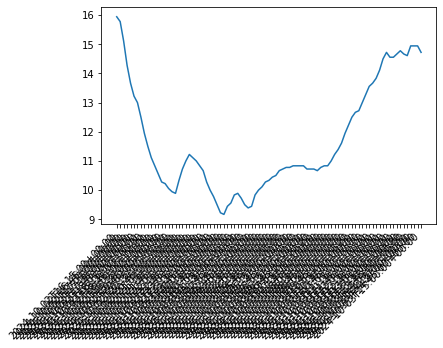

In [6]:
# set up the canvas
fig, ax = plt.subplots(1, 1)

# define the x and y values
x_values = df["reportStartDateTime"]
y_values = df["dryBulbTemperature_Celsius"]

# create the plot
ax.plot(x_values, y_values)

# rotate the x-labels for better viewing
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")

The labels on x-axis are too close together. Need to thin them out. Also remove the date, just keep the time.

pandas datetime

- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

User guide:

- https://pandas.pydata.org/docs/user_guide/timeseries.html




In [7]:
# convert reportStartDateTime column to pandas datetime format
df["reportStartDateTime"] = pd.to_datetime(df["reportStartDateTime"])

# view
df["reportStartDateTime"]

0    2024-10-02 16:15:00+00:00
1    2024-10-02 16:45:00+00:00
2    2024-10-02 17:00:00+00:00
3    2024-10-02 17:15:00+00:00
4    2024-10-02 17:30:00+00:00
                ...           
84   2024-10-03 14:00:00+00:00
85   2024-10-03 14:15:00+00:00
86   2024-10-03 14:30:00+00:00
87   2024-10-03 14:45:00+00:00
88   2024-10-03 15:00:00+00:00
Name: reportStartDateTime, Length: 89, dtype: datetime64[ns, UTC]

In [8]:
# now extract just the hours
df["hour"] = df["reportStartDateTime"].dt.hour

# new Series
df["hour"]

0     16
1     16
2     17
3     17
4     17
      ..
84    14
85    14
86    14
87    14
88    15
Name: hour, Length: 89, dtype: int32

In [9]:
# extract both hours and minutes using strftime()
df["hours_and_minutes"] = df["reportStartDateTime"].dt.strftime('%H:%M')

# view new Series
df["hours_and_minutes"]

0     16:15
1     16:45
2     17:00
3     17:15
4     17:30
      ...  
84    14:00
85    14:15
86    14:30
87    14:45
88    15:00
Name: hours_and_minutes, Length: 89, dtype: object

strftime() cheatsheet:

- https://strftime.org/

Now plot using the hours_minutes Series.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

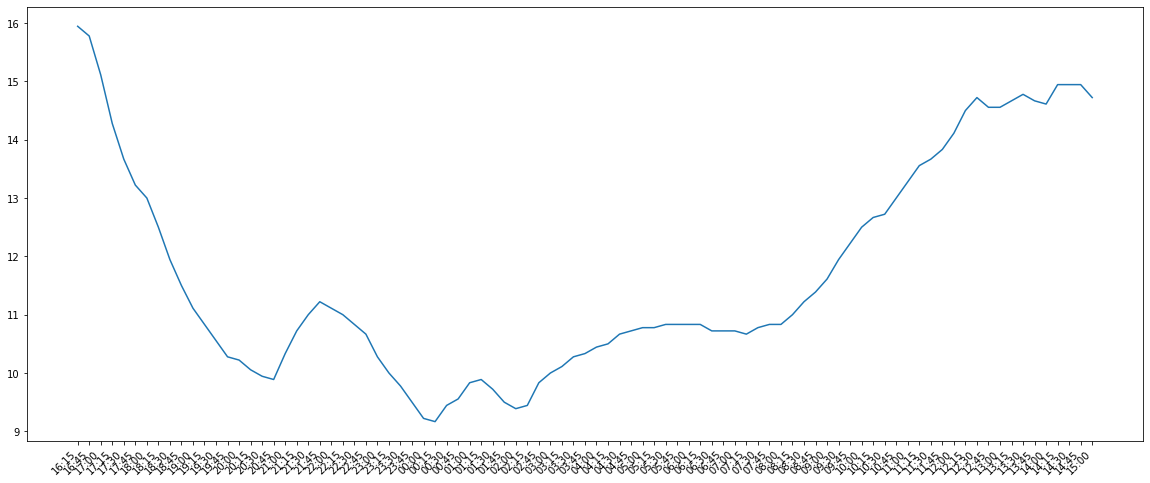

In [12]:
# set up canvas
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# define x an y values
x_values = df["hours_and_minutes"]
y_values = df["dryBulbTemperature_Celsius"]

# create the plot
ax.plot(x_values, y_values)

# rotate the x-labels for better viewing (from andrews lecture)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")

Turns out there is a package for using dates as x-axis labels easily. 

- https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels

Matplotlib has a librabry for manipulating date data:

- https://matplotlib.org/stable/api/dates_api.html

Theres a good example of its use found here:

- https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

You can use the DateFormatter to 

- https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.DateFormatter


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

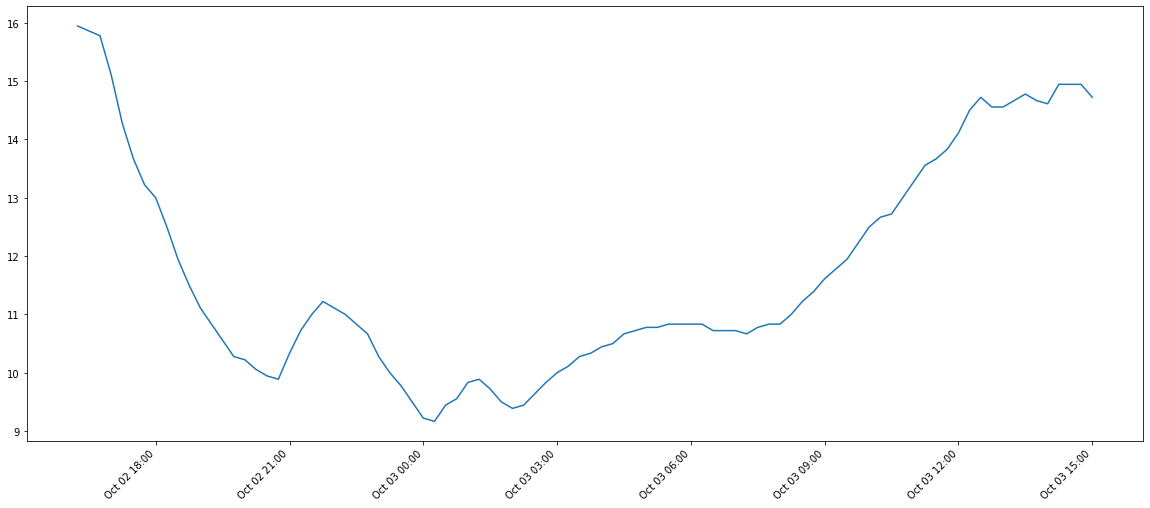

In [15]:
from datetime import datetime
from matplotlib.dates import DateFormatter

# set up canvas
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# define x an y values
x_values = df["reportStartDateTime"]
y_values = df["dryBulbTemperature_Celsius"]

# create the plot
ax.plot(x_values, y_values)

# set the date fomrat
date_format = DateFormatter("%b %d %H:%M")

# then add the labels using the formatted date
ax.xaxis.set_major_formatter(date_format)

# rotate the x-labels for better viewing
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
